In [ ]:
라이브러리 임포트

In [5]:
from PIL import Image
from skimage import data, img_as_float
from skimage.color import rgb2gray
from skimage.transform import rescale
from skimage.io import imread, imshow, show

from scipy import ndimage, misc, signal, fftpack as fp
import matplotlib.pylab as pylab
import numpy as np
import timeit

In [3]:
# scipy 1.1 버전부터 signaltonoise() 함수 제공되지 않음
# 아래 함수 구현으로 사용함

def signaltonoise(a, axis=0, ddof=0):
    a = np.asanyarray(a)
    m = a.mean(axis)
    sd = a.std(axis=axis, ddof=ddof)
    return np.where(sd == 0, 0, m/sd)

In [ ]:
scipy.fftpack 모듈을 사용한 FFT

SNR for the original image = 2.023722773801701
SNR for the image obtained after reconstruction = 2.023722773801701


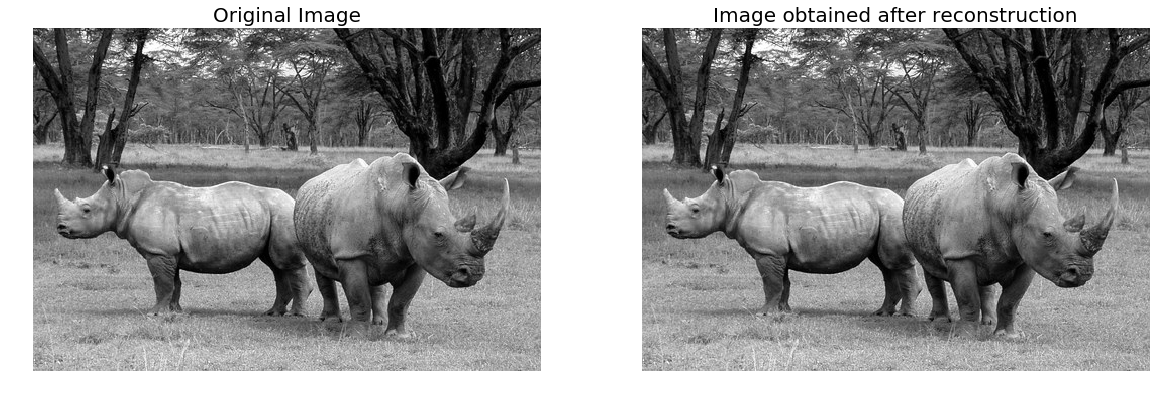

In [6]:
# import scipy.fftpack as fp

im = np.array(Image.open('../images/rhino.jpg').convert('L')) 
snr = signaltonoise(im, axis=None)
print('SNR for the original image = ' + str(snr))
# SNR for the original image = 2.023722773801701

# now call FFT and IFFT
freq = fp.fft2(im)
im1 = fp.ifft2(freq).real
snr = signaltonoise(im1, axis=None)
print('SNR for the image obtained after reconstruction = ' + str(snr))
# SNR for the image obtained after reconstruction = 2.0237227738013224

assert(np.allclose(im, im1)) 
pylab.figure(figsize=(20,10))
pylab.subplot(121), pylab.imshow(im, cmap='gray'), pylab.axis('off')
pylab.title('Original Image', size=20)
pylab.subplot(122), pylab.imshow(im1, cmap='gray'), pylab.axis('off')
pylab.title('Image obtained after reconstruction', size=20)
pylab.show()

In [ ]:
주파수 스펙트럼 그리기

C:\Users\bae22\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: ComplexWarning: Casting complex values to real discards the imaginary part
  after removing the cwd from sys.path.


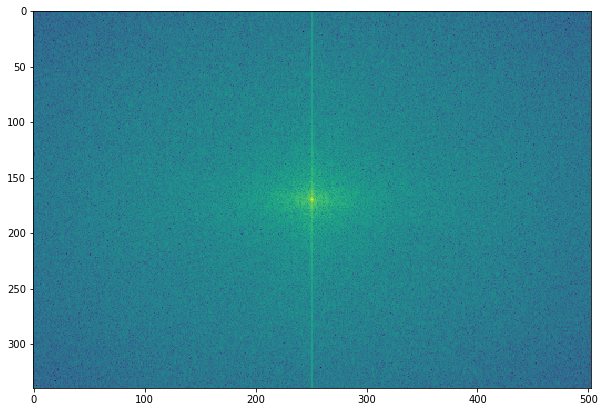

In [20]:
# the quadrants are needed to be shifted around in order that the low spatial frequencies are in the center of the 2D fourier-transformed image.
freq2 = fp.fftshift(freq)
pylab.figure(figsize=(10,10))
pylab.imshow( (20*np.log10( 0.1 + freq2)).astype(int))
pylab.show()

numpy.fft 모듈을 이용한 FFT

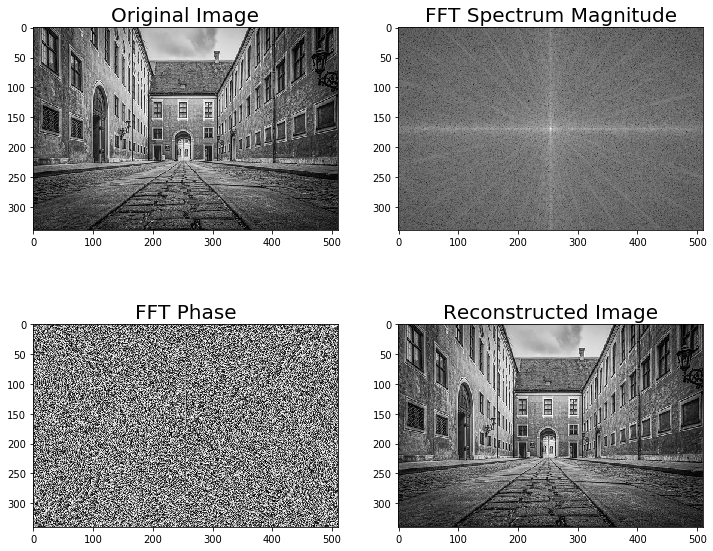

In [22]:
import numpy.fft as fp

im1 = rgb2gray(imread('../images/house.png'))
freq1 = fp.fft2(im1)
im1_ = fp.ifft2(freq1).real

pylab.figure(figsize=(12,10))
pylab.subplot(2,2,1), pylab.imshow(im1, cmap='gray')
pylab.title('Original Image', size=20)
pylab.subplot(2,2,2), pylab.imshow(20*np.log10( 0.01 +
np.abs(fp.fftshift(freq1))), cmap='gray')
pylab.title('FFT Spectrum Magnitude', size=20)

pylab.subplot(2,2,3), pylab.imshow(np.angle(fp.fftshift(freq1)), cmap='gray')
pylab.title('FFT Phase', size=20)
pylab.subplot(2,2,4), pylab.imshow(np.clip(im1_,0,255), cmap='gray')
pylab.title('Reconstructed Image', size=20)
pylab.show()

크기에 log 함수 적용

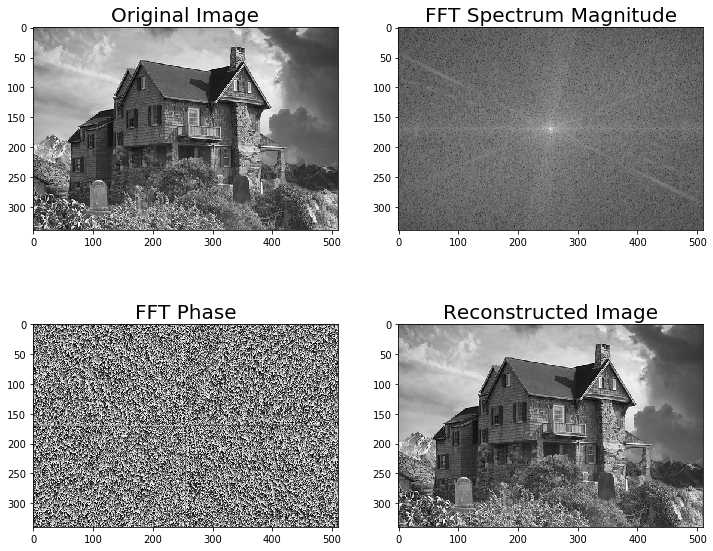

In [25]:
im2 = rgb2gray(imread('../images/house2.png'))
freq2 = fp.fft2(im2)
im2_ = fp.ifft2(freq2).real

mag = 20*np.log10(0.01 + np.abs(fp.fftshift(freq2)))

pylab.figure(figsize=(12,10))
pylab.subplot(2,2,1), pylab.imshow(im2, cmap='gray')
pylab.title('Original Image', size=20)
pylab.subplot(2,2,2), pylab.imshow(mag, cmap='gray')
pylab.title('FFT Spectrum Magnitude', size=20)

pylab.subplot(2,2,3), pylab.imshow(np.angle(fp.fftshift(freq2)), cmap='gray')
pylab.title('FFT Phase', size=20)
pylab.subplot(2,2,4), pylab.imshow(np.clip(im2_,0,255), cmap='gray')
pylab.title('Reconstructed Image', size=20)
pylab.show()

In [ ]:
크기와 위상으로 재구성 

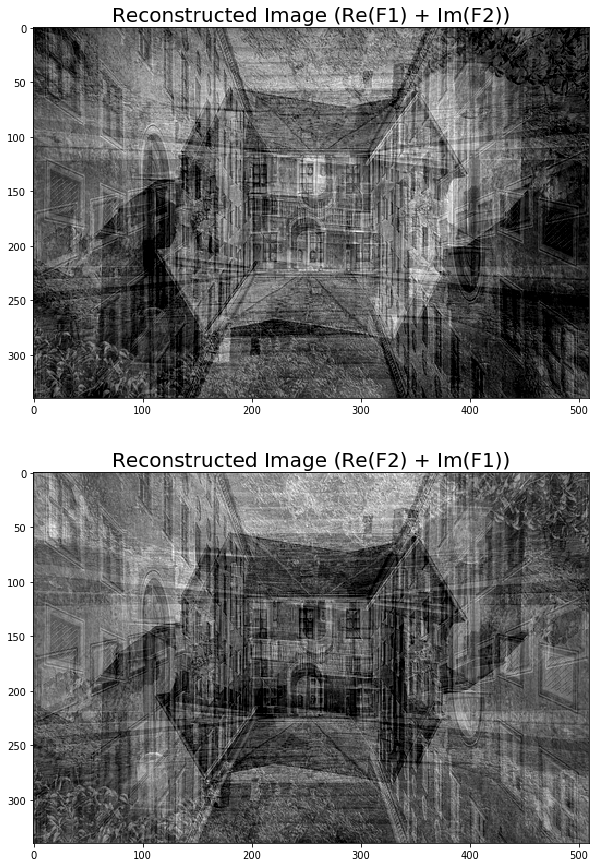

In [26]:
im1_ = fp.ifft2(np.vectorize(complex)(freq1.real, freq2.imag)).real
im2_ = fp.ifft2(np.vectorize(complex)(freq2.real, freq1.imag)).real

pylab.figure(figsize=(20,15))
pylab.subplot(211), pylab.imshow(np.clip(im1_,0,255), cmap='gray')
pylab.title('Reconstructed Image (Re(F1) + Im(F2))', size=20)
pylab.subplot(212), pylab.imshow(np.clip(im2_,0,255), cmap='gray')
pylab.title('Reconstructed Image (Re(F2) + Im(F1))', size=20)
pylab.show()